In [311]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [312]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [314]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import pickle

In [315]:
#import dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [316]:
# sorting the dataframe based on location and date
df=df.sort_values(by=['Location','Date']).reset_index(drop=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2014-06-07,Adelaide,9.5,19.3,0.0,NaN,NaN,SSE,28.0,NaN,...,91.0,51.0,1035.0,1032.2,NaN,NaN,12.5,19.0,No,No
1,2014-06-08,Adelaide,9.8,17.0,0.0,NaN,NaN,SSE,26.0,SE,...,67.0,53.0,1034.9,1032.9,NaN,NaN,14.1,16.6,No,No
2,2014-06-09,Adelaide,6.7,14.5,0.0,NaN,NaN,NNE,24.0,NNE,...,72.0,52.0,1033.3,1029.2,NaN,NaN,9.2,13.9,No,No
3,2014-06-10,Adelaide,5.7,19.0,0.0,4.4,NaN,NNE,33.0,N,...,48.0,41.0,1027.2,1022.8,NaN,NaN,13.6,18.5,No,No
4,2014-06-11,Adelaide,9.7,17.2,0.0,2.0,NaN,N,30.0,NNE,...,54.0,53.0,1020.6,1017.0,NaN,NaN,15.1,16.3,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,52.0,73.0,1012.2,1016.0,NaN,8.0,13.7,12.1,No,Yes
8421,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,57.0,56.0,1026.1,1024.2,NaN,NaN,11.8,15.5,Yes,No
8422,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,57.0,56.0,1026.1,1024.2,NaN,NaN,11.8,15.5,Yes,No
8423,2009-07-25,Wollongong,7.3,16.7,0.0,NaN,NaN,WNW,28.0,SW,...,56.0,54.0,1026.1,1021.9,NaN,NaN,12.3,15.5,No,No


In [317]:
#view few top rows
df.head().T

,0,1,2,3,4
Date,2014-06-07,2014-06-08,2014-06-09,2014-06-10,2014-06-11
Location,Adelaide,Adelaide,Adelaide,Adelaide,Adelaide
MinTemp,9.5,9.8,6.7,5.7,9.7
MaxTemp,19.3,17.0,14.5,19.0,17.2
Rainfall,0.0,0.0,0.0,0.0,0.0
Evaporation,NaN,NaN,NaN,4.4,2.0
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,SSE,SSE,NNE,NNE,N
WindGustSpeed,28.0,26.0,24.0,33.0,30.0
WindDir9am,NaN,SE,NNE,N,NNE


In [318]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Null values are present for few of the columns.

We also have to predict the amount of rainfall for tomorrow so will create a new column using rainfall for today column

In [319]:
df['RainfallTomorrow']=df.groupby(['Location'])['Rainfall'].shift(-1)
df['RainfallTomorrow']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    1.2
8421    1.2
8422    0.0
8423    0.0
8424    NaN
Name: RainfallTomorrow, Length: 8425, dtype: float64

As we have to predict rain tomorrow and rainfall value for tomorrow, we will only keep the rows where rainfall and rain tomorrow value is not null.

In [320]:
df=df[~df['Rainfall'].isna() & ~df['RainfallTomorrow'].isna() & ~df['RainToday'].isna() & ~df['RainTomorrow'].isna()].reset_index(drop=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2014-06-07,Adelaide,9.5,19.3,0.0,NaN,NaN,SSE,28.0,NaN,...,51.0,1035.0,1032.2,NaN,NaN,12.5,19.0,No,No,0.0
1,2014-06-08,Adelaide,9.8,17.0,0.0,NaN,NaN,SSE,26.0,SE,...,53.0,1034.9,1032.9,NaN,NaN,14.1,16.6,No,No,0.0
2,2014-06-09,Adelaide,6.7,14.5,0.0,NaN,NaN,NNE,24.0,NNE,...,52.0,1033.3,1029.2,NaN,NaN,9.2,13.9,No,No,0.0
3,2014-06-10,Adelaide,5.7,19.0,0.0,4.4,NaN,NNE,33.0,N,...,41.0,1027.2,1022.8,NaN,NaN,13.6,18.5,No,No,0.0
4,2014-06-11,Adelaide,9.7,17.2,0.0,2.0,NaN,N,30.0,NNE,...,53.0,1020.6,1017.0,NaN,NaN,15.1,16.3,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,73.0,1012.2,1016.0,NaN,8.0,13.7,12.1,No,Yes,0.6
8065,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,73.0,1012.2,1016.0,NaN,8.0,13.7,12.1,No,Yes,1.2
8066,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,56.0,1026.1,1024.2,NaN,NaN,11.8,15.5,Yes,No,1.2
8067,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,56.0,1026.1,1024.2,NaN,NaN,11.8,15.5,Yes,No,0.0


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8069 entries, 0 to 8068
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8069 non-null   object 
 1   Location          8069 non-null   object 
 2   MinTemp           8021 non-null   float64
 3   MaxTemp           8035 non-null   float64
 4   Rainfall          8069 non-null   float64
 5   Evaporation       4698 non-null   float64
 6   Sunshine          4236 non-null   float64
 7   WindGustDir       7125 non-null   object 
 8   WindGustSpeed     7125 non-null   float64
 9   WindDir9am        7274 non-null   object 
 10  WindDir3pm        7787 non-null   object 
 11  WindSpeed9am      8020 non-null   float64
 12  WindSpeed3pm      7987 non-null   float64
 13  Humidity9am       8033 non-null   float64
 14  Humidity3pm       7990 non-null   float64
 15  Pressure9am       6786 non-null   float64
 16  Pressure3pm       6785 non-null   float64


In [322]:
#converting date column data type to datatime data type.
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2014-06-07,Adelaide,9.5,19.3,0.0,NaN,NaN,SSE,28.0,NaN,...,51.0,1035.0,1032.2,NaN,NaN,12.5,19.0,No,No,0.0
1,2014-06-08,Adelaide,9.8,17.0,0.0,NaN,NaN,SSE,26.0,SE,...,53.0,1034.9,1032.9,NaN,NaN,14.1,16.6,No,No,0.0
2,2014-06-09,Adelaide,6.7,14.5,0.0,NaN,NaN,NNE,24.0,NNE,...,52.0,1033.3,1029.2,NaN,NaN,9.2,13.9,No,No,0.0
3,2014-06-10,Adelaide,5.7,19.0,0.0,4.4,NaN,NNE,33.0,N,...,41.0,1027.2,1022.8,NaN,NaN,13.6,18.5,No,No,0.0
4,2014-06-11,Adelaide,9.7,17.2,0.0,2.0,NaN,N,30.0,NNE,...,53.0,1020.6,1017.0,NaN,NaN,15.1,16.3,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,73.0,1012.2,1016.0,NaN,8.0,13.7,12.1,No,Yes,0.6
8065,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,73.0,1012.2,1016.0,NaN,8.0,13.7,12.1,No,Yes,1.2
8066,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,56.0,1026.1,1024.2,NaN,NaN,11.8,15.5,Yes,No,1.2
8067,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,56.0,1026.1,1024.2,NaN,NaN,11.8,15.5,Yes,No,0.0


In [323]:
#extracting year from date column as year could be an important variable for determining target variable.
df['year']=df['Date'].dt.year
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,year
0,2014-06-07,Adelaide,9.5,19.3,0.0,NaN,NaN,SSE,28.0,NaN,...,1035.0,1032.2,NaN,NaN,12.5,19.0,No,No,0.0,2014
1,2014-06-08,Adelaide,9.8,17.0,0.0,NaN,NaN,SSE,26.0,SE,...,1034.9,1032.9,NaN,NaN,14.1,16.6,No,No,0.0,2014
2,2014-06-09,Adelaide,6.7,14.5,0.0,NaN,NaN,NNE,24.0,NNE,...,1033.3,1029.2,NaN,NaN,9.2,13.9,No,No,0.0,2014
3,2014-06-10,Adelaide,5.7,19.0,0.0,4.4,NaN,NNE,33.0,N,...,1027.2,1022.8,NaN,NaN,13.6,18.5,No,No,0.0,2014
4,2014-06-11,Adelaide,9.7,17.2,0.0,2.0,NaN,N,30.0,NNE,...,1020.6,1017.0,NaN,NaN,15.1,16.3,No,No,0.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,1012.2,1016.0,NaN,8.0,13.7,12.1,No,Yes,0.6,2009
8065,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,1012.2,1016.0,NaN,8.0,13.7,12.1,No,Yes,1.2,2009
8066,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,1026.1,1024.2,NaN,NaN,11.8,15.5,Yes,No,1.2,2009
8067,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,1026.1,1024.2,NaN,NaN,11.8,15.5,Yes,No,0.0,2009


In [324]:
#extracting month from date column as month could be an important variable for determining target variable.
df['month']=df['Date'].dt.month
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,year,month
0,2014-06-07,Adelaide,9.5,19.3,0.0,NaN,NaN,SSE,28.0,NaN,...,1032.2,NaN,NaN,12.5,19.0,No,No,0.0,2014,6
1,2014-06-08,Adelaide,9.8,17.0,0.0,NaN,NaN,SSE,26.0,SE,...,1032.9,NaN,NaN,14.1,16.6,No,No,0.0,2014,6
2,2014-06-09,Adelaide,6.7,14.5,0.0,NaN,NaN,NNE,24.0,NNE,...,1029.2,NaN,NaN,9.2,13.9,No,No,0.0,2014,6
3,2014-06-10,Adelaide,5.7,19.0,0.0,4.4,NaN,NNE,33.0,N,...,1022.8,NaN,NaN,13.6,18.5,No,No,0.0,2014,6
4,2014-06-11,Adelaide,9.7,17.2,0.0,2.0,NaN,N,30.0,NNE,...,1017.0,NaN,NaN,15.1,16.3,No,No,0.0,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,1016.0,NaN,8.0,13.7,12.1,No,Yes,0.6,2009,7
8065,2009-07-23,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,...,1016.0,NaN,8.0,13.7,12.1,No,Yes,1.2,2009,7
8066,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,1024.2,NaN,NaN,11.8,15.5,Yes,No,1.2,2009,7
8067,2009-07-24,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,...,1024.2,NaN,NaN,11.8,15.5,Yes,No,0.0,2009,7


In [325]:
#dropping column Date as year column is also given, so we will use year column in our prediction.
df.drop(columns=['Date'],inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,year,month
0,Adelaide,9.5,19.3,0.0,NaN,NaN,SSE,28.0,NaN,S,...,1032.2,NaN,NaN,12.5,19.0,No,No,0.0,2014,6
1,Adelaide,9.8,17.0,0.0,NaN,NaN,SSE,26.0,SE,SSE,...,1032.9,NaN,NaN,14.1,16.6,No,No,0.0,2014,6
2,Adelaide,6.7,14.5,0.0,NaN,NaN,NNE,24.0,NNE,NE,...,1029.2,NaN,NaN,9.2,13.9,No,No,0.0,2014,6
3,Adelaide,5.7,19.0,0.0,4.4,NaN,NNE,33.0,N,N,...,1022.8,NaN,NaN,13.6,18.5,No,No,0.0,2014,6
4,Adelaide,9.7,17.2,0.0,2.0,NaN,N,30.0,NNE,NNE,...,1017.0,NaN,NaN,15.1,16.3,No,No,0.0,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,S,...,1016.0,NaN,8.0,13.7,12.1,No,Yes,0.6,2009,7
8065,Wollongong,9.0,17.0,0.6,NaN,NaN,WSW,72.0,SW,S,...,1016.0,NaN,8.0,13.7,12.1,No,Yes,1.2,2009,7
8066,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,NE,...,1024.2,NaN,NaN,11.8,15.5,Yes,No,1.2,2009,7
8067,Wollongong,8.8,15.6,1.2,NaN,NaN,SSW,33.0,SSW,NE,...,1024.2,NaN,NaN,11.8,15.5,Yes,No,0.0,2009,7


### Exploratory Data Analysis

In [326]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Melbourne       1442
PerthAirport    1203
Williamtown     1135
Albury           888
Newcastle        803
CoffsHarbour     608
Brisbane         568
Penrith          475
Wollongong       463
Darwin           249
Adelaide         197
Uluru             38
Name: Location, dtype: int64


 12.0    73
 12.7    66
 10.8    66
 13.2    66
 13.8    66
         ..
-0.8      1
-1.7      1
-1.5      1
 28.0     1
 28.5     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
19.8    73
23.8    71
25.0    69
22.3    68
        ..
8.2      1
10.3     1
9.4      1
39.7     1
11.2     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5226
0.2       403
0.4       176
0.6       112
1.2        84
         ... 
31.1        1
132.5       1
62.6        1
35.8        1
41.2        1
Name: Rainfall, Length: 250, dtype: int64


4.0     173
3.0     157
2.2     142
2.4     139
2.6     137
       ... 
17.0      1
18.6      1
22.4      1
17.6      1
19.2      1
Name: Evaporation, Length: 115, dtype: int64


0

#### Univariate Analysis

In [327]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow', 'year',
       'month'],
      dtype='object')

In [328]:
#spliting the columns into two categories for further analysis
numerical_col=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'RainfallTomorrow']
categorical_col=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

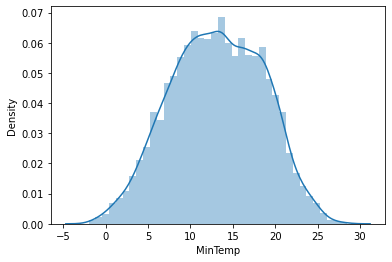

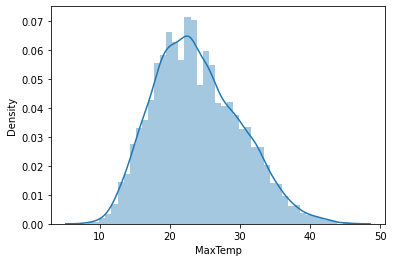

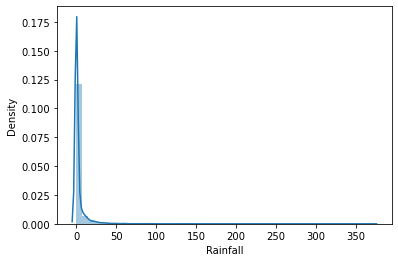

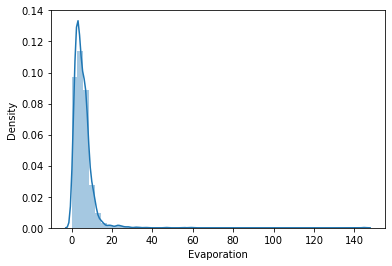

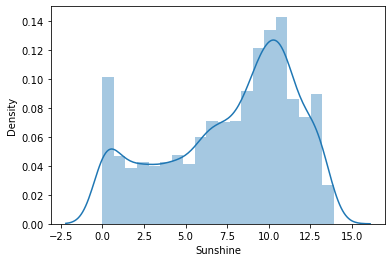

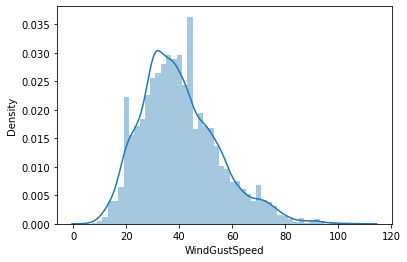

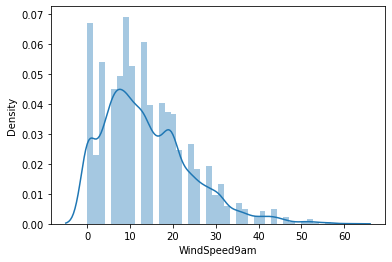

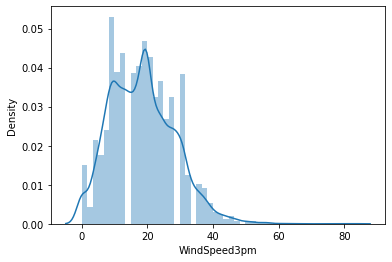

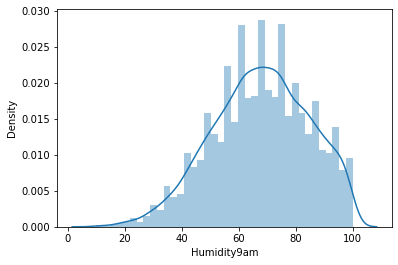

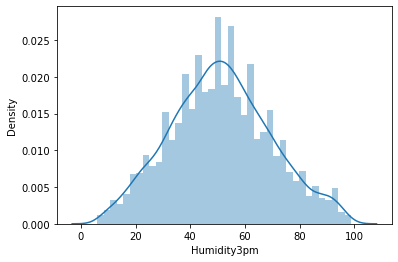

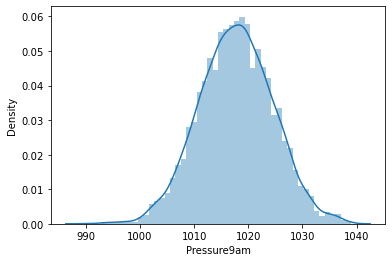

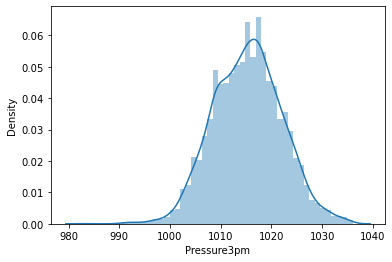

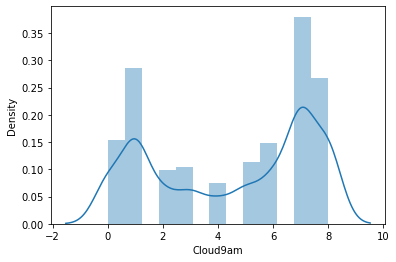

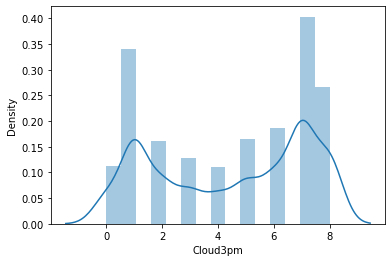

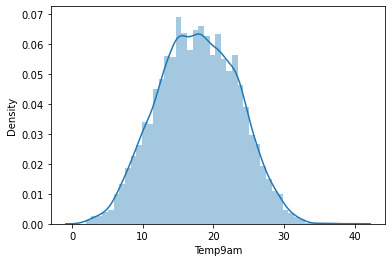

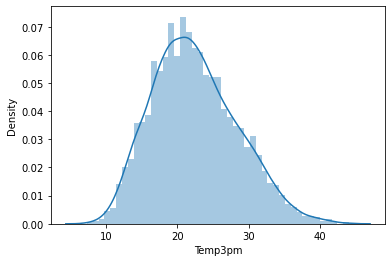

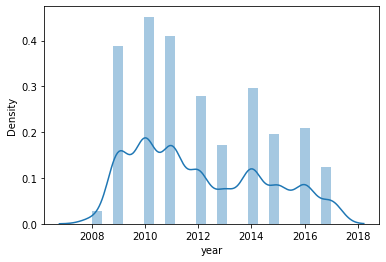

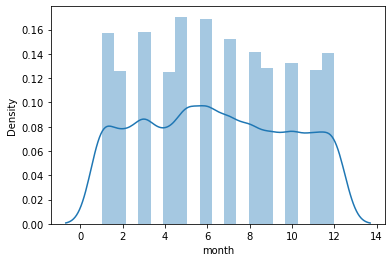

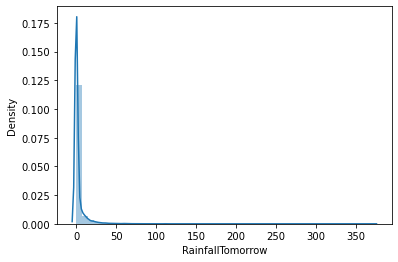

In [329]:
#Display distribution for all numerical columns.
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

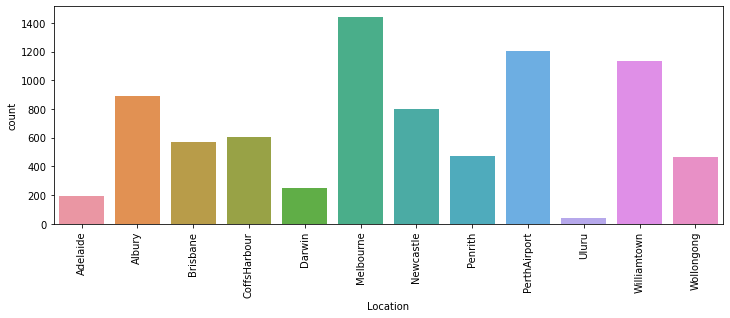

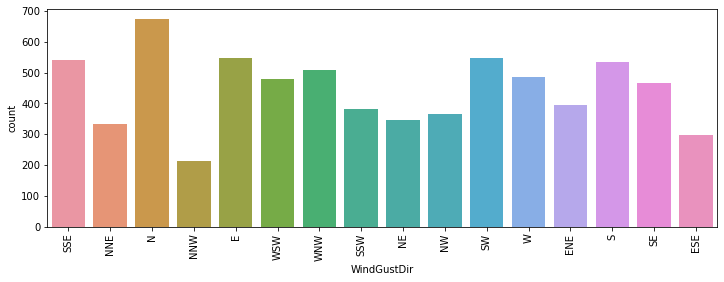

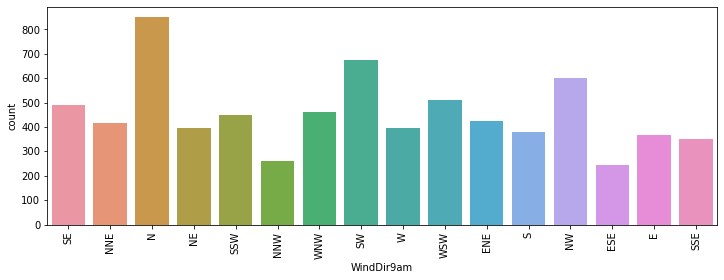

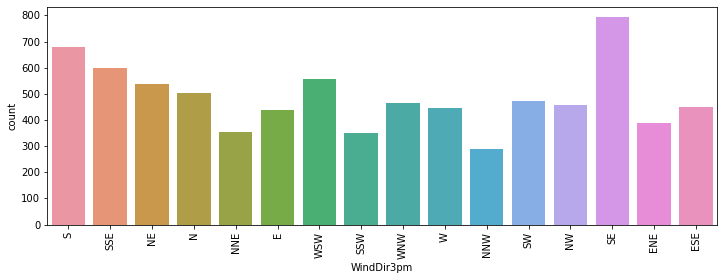

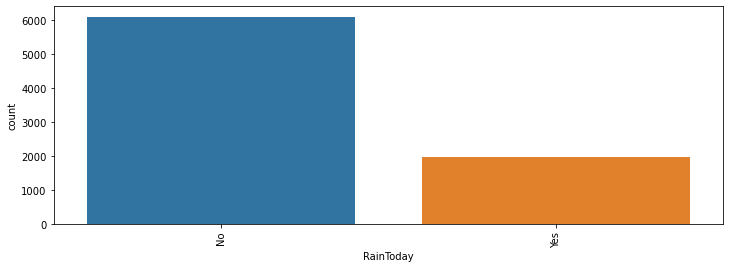

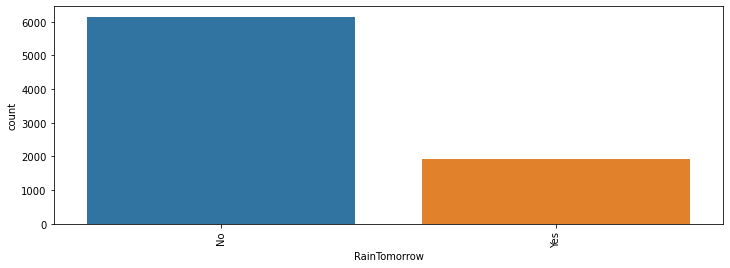

In [330]:
#Display value_counts of all categorical columns 
for i in categorical_col:
    plt.figure(figsize=(12,4))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

#### Bivariate Analysis

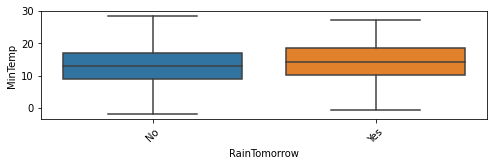

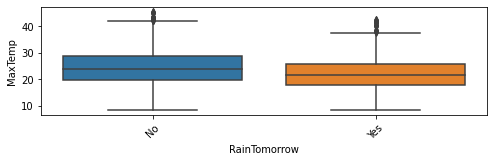

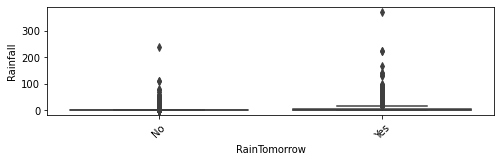

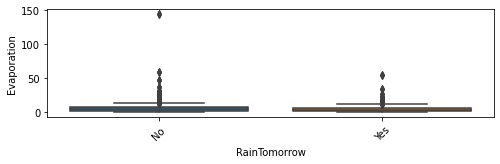

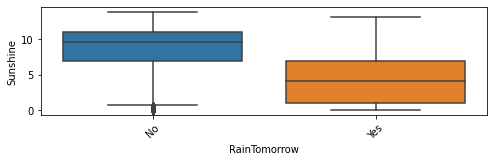

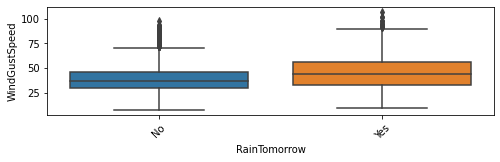

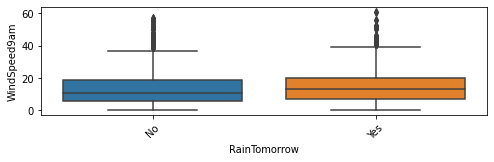

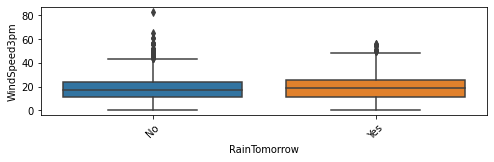

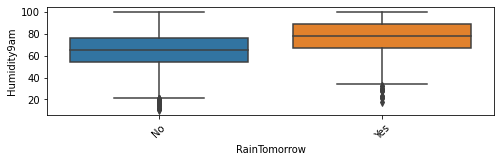

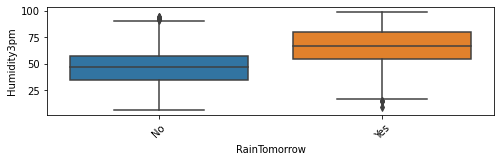

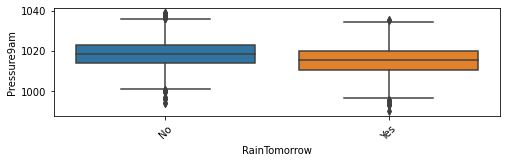

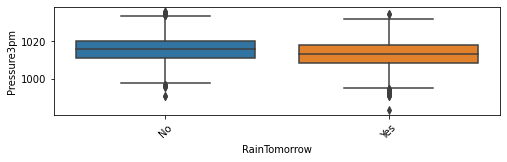

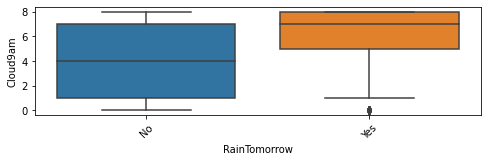

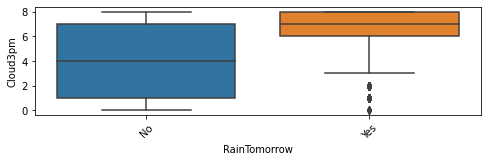

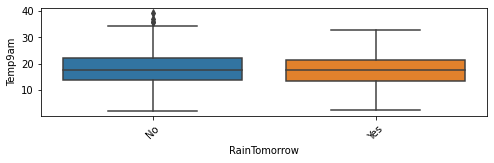

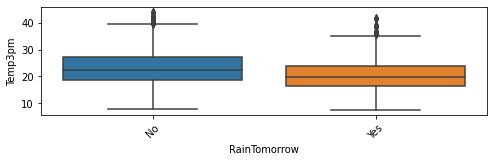

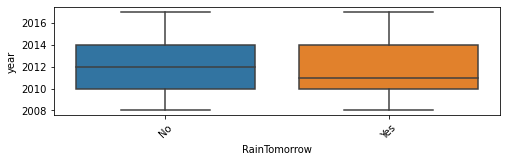

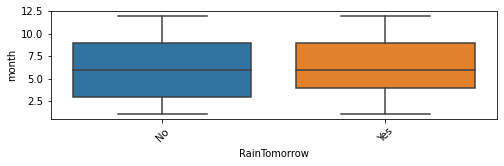

In [331]:
#For all numerical columns compare the value ranges for RainTomorrow
for i in numerical_col[:-1]:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df['RainTomorrow'],y=df[i])
    plt.xticks(rotation=45)
    plt.show()

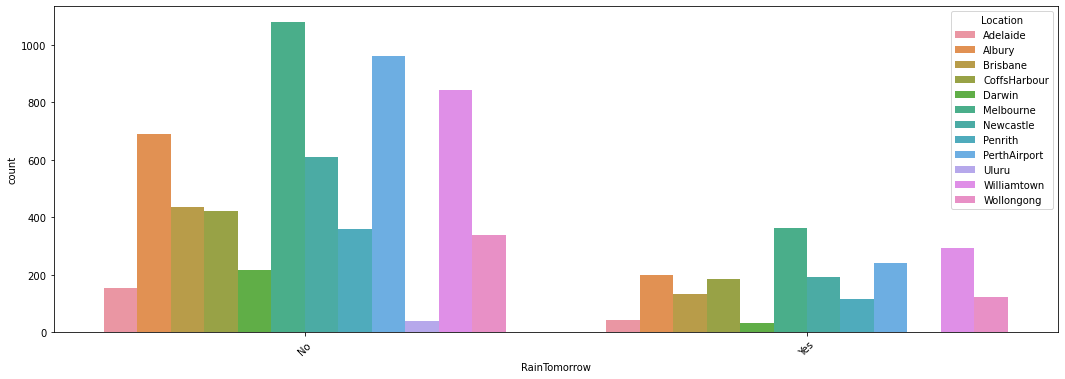

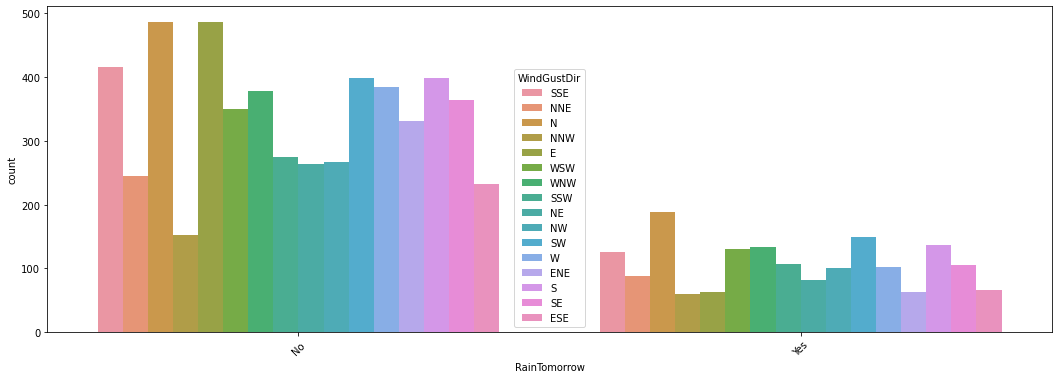

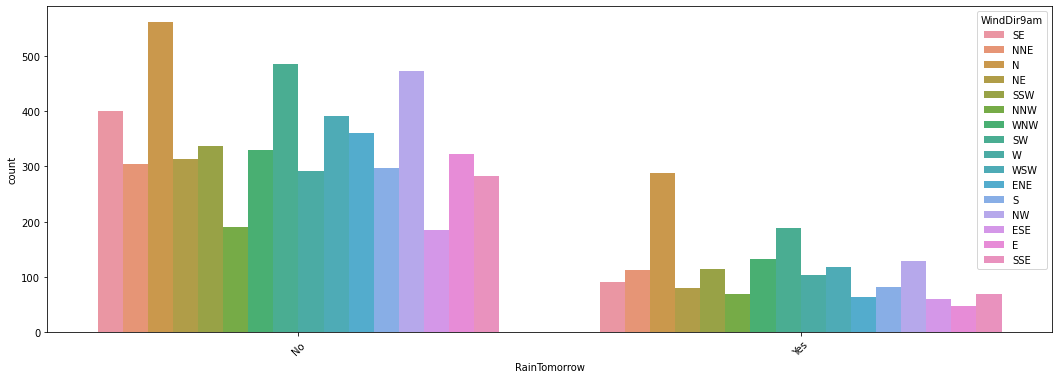

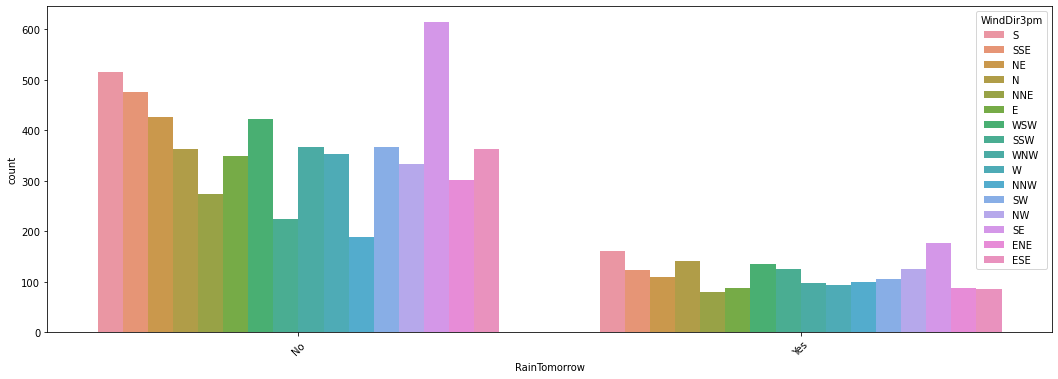

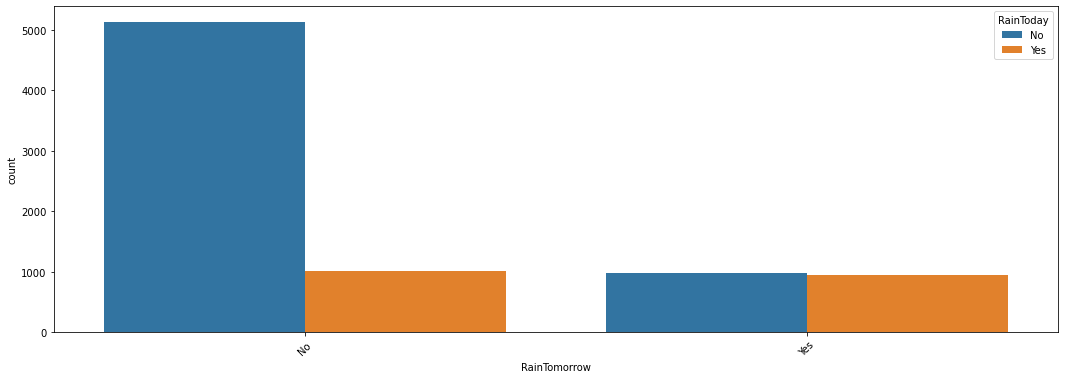

In [332]:
#compare categorical columns
for i in categorical_col[:-1]:
    plt.figure(figsize=(18,6))
    sns.countplot(hue=df[i],x=df['RainTomorrow'])
    plt.xticks(rotation=45)
    plt.show()

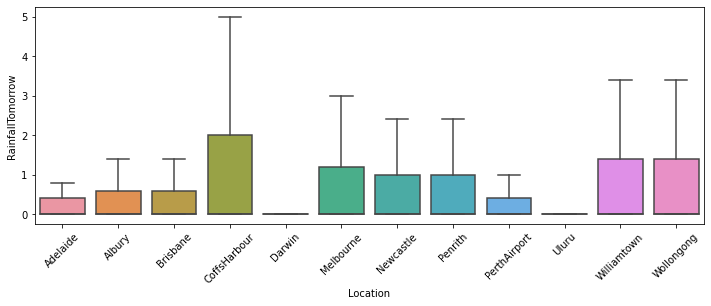

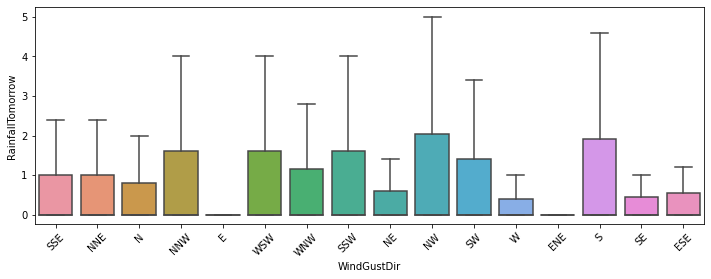

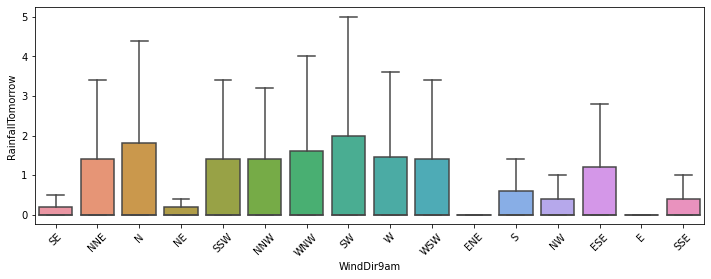

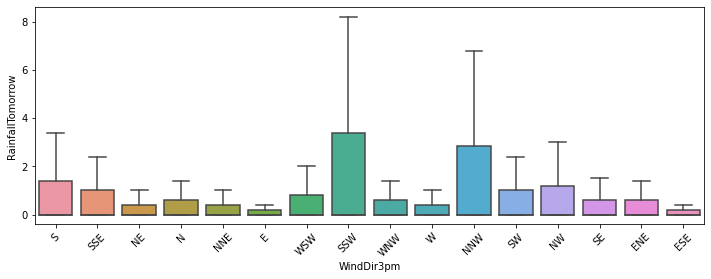

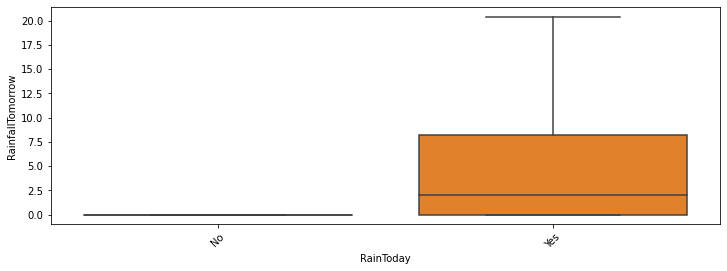

In [333]:
# For all categorical columns compare the values ranges of RainfallTomorrow(target variable)
for i in categorical_col[:-1]:
    plt.figure(figsize=(12,4))
    sns.boxplot(x=df[i],y=df['RainfallTomorrow'], showfliers=False)
    plt.xticks(rotation=45)
    plt.show()

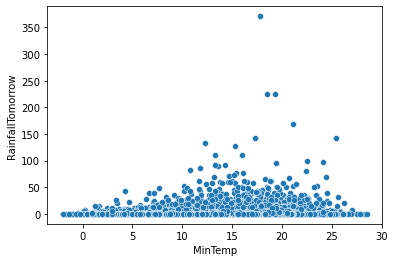

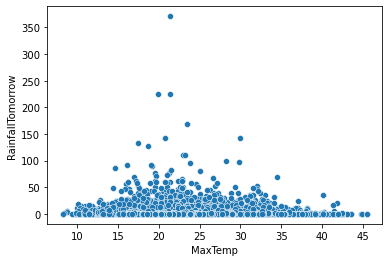

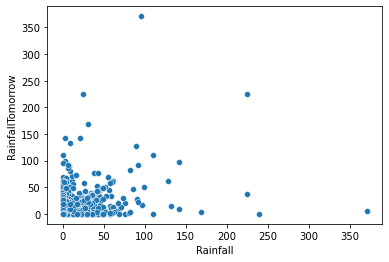

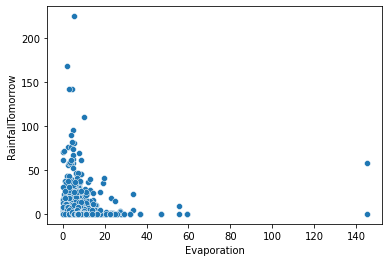

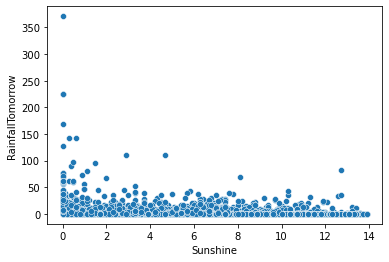

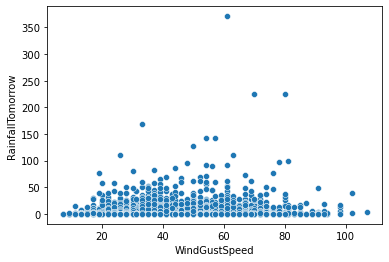

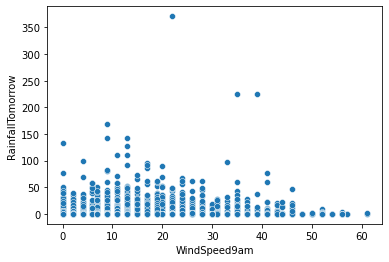

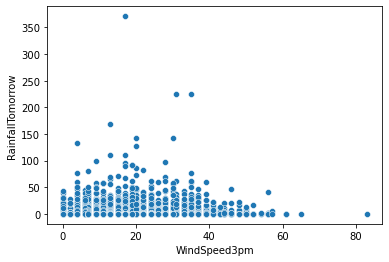

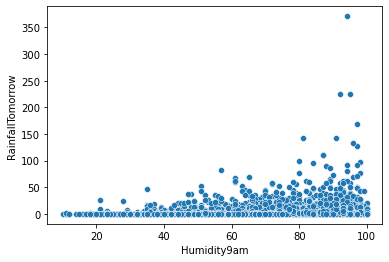

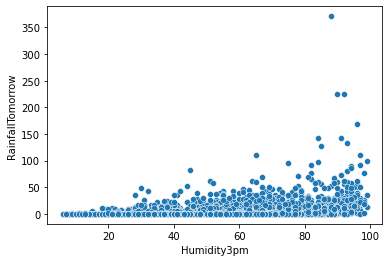

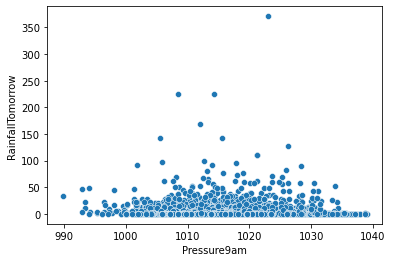

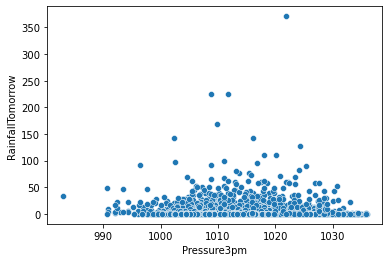

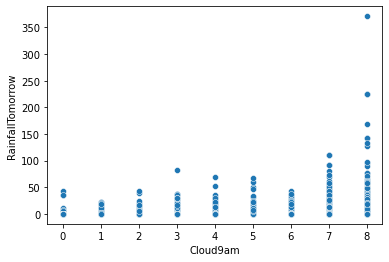

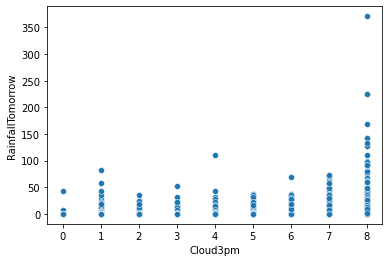

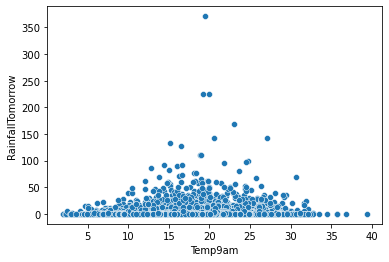

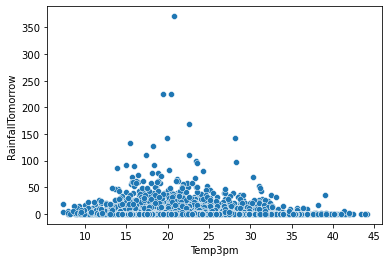

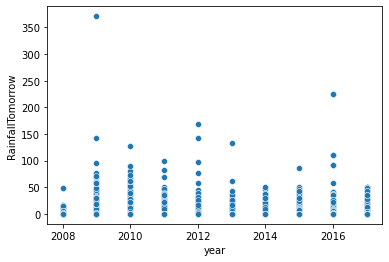

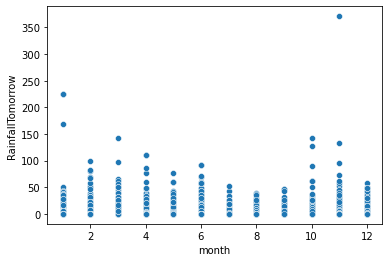

In [334]:
# for all numerical columns check how the RainfallTomorrow vary
for i in numerical_col[:-1]:
    sns.scatterplot(y=df['RainfallTomorrow'],x=df[i])
    plt.show()

#### Multivariate Analysis

<AxesSubplot:>

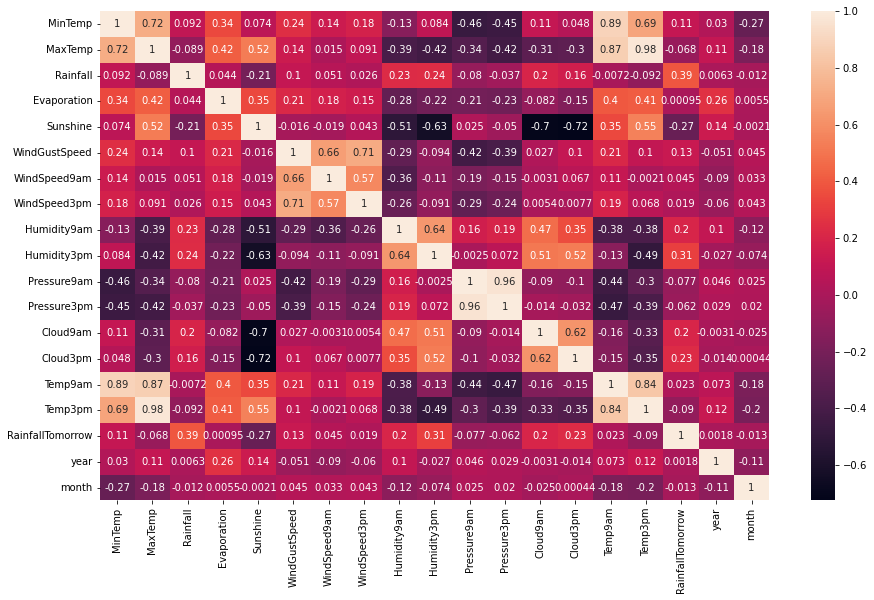

In [335]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

Few columns have high correlation will drop them after checking vif

#### Fill missing values

In [336]:
df.isna().sum().sort_values(ascending=False)

Sunshine            3833
Evaporation         3371
Cloud3pm            2241
Cloud9am            2204
Pressure3pm         1284
Pressure9am         1283
WindGustDir          944
WindGustSpeed        944
WindDir9am           795
WindDir3pm           282
WindSpeed3pm          82
Humidity3pm           79
Temp3pm               73
WindSpeed9am          49
MinTemp               48
Humidity9am           36
MaxTemp               34
Temp9am               33
RainTomorrow           0
year                   0
RainfallTomorrow       0
Location               0
RainToday              0
Rainfall               0
month                  0
dtype: int64

##### Numerical columns are filled by the median calculated based on whether it rained today or not

In [337]:
df['Sunshine_median']=df['RainToday'].map(df.groupby(['RainToday'])['Sunshine'].median().to_dict())
df['Sunshine']=np.where(df['Sunshine'].isna(),df['Sunshine_median'],df['Sunshine'])
df.drop(columns=['Sunshine_median'],inplace=True)

In [338]:
df['Evaporation_median']=df['RainToday'].map(df.groupby(['RainToday'])['Evaporation'].median().to_dict())
df['Evaporation']=np.where(df['Evaporation'].isna(),df['Evaporation_median'],df['Evaporation'])
df.drop(columns=['Evaporation_median'],inplace=True)

In [339]:
df['Cloud3pm_median']=df['RainToday'].map(df.groupby(['RainToday'])['Cloud3pm'].median().to_dict())
df['Cloud3pm']=np.where(df['Cloud3pm'].isna(),df['Cloud3pm_median'],df['Cloud3pm'])
df.drop(columns=['Cloud3pm_median'],inplace=True)

In [340]:
df['Cloud9am_median']=df['RainToday'].map(df.groupby(['RainToday'])['Cloud9am'].median().to_dict())
df['Cloud9am']=np.where(df['Cloud9am'].isna(),df['Cloud9am_median'],df['Cloud9am'])
df.drop(columns=['Cloud9am_median'],inplace=True)

In [341]:
df['Pressure3pm_median']=df['RainToday'].map(df.groupby(['RainToday'])['Pressure3pm'].median().to_dict())
df['Pressure3pm']=np.where(df['Pressure3pm'].isna(),df['Pressure3pm_median'],df['Pressure3pm'])
df.drop(columns=['Pressure3pm_median'],inplace=True)

In [342]:
df['Pressure9am_median']=df['RainToday'].map(df.groupby(['RainToday'])['Pressure9am'].median().to_dict())
df['Pressure9am']=np.where(df['Pressure9am'].isna(),df['Pressure9am_median'],df['Pressure9am'])
df.drop(columns=['Pressure9am_median'],inplace=True)

In [343]:
df['WindGustSpeed_median']=df['RainToday'].map(df.groupby(['RainToday'])['WindGustSpeed'].median().to_dict())
df['WindGustSpeed']=np.where(df['WindGustSpeed'].isna(),df['WindGustSpeed_median'],df['WindGustSpeed'])
df.drop(columns=['WindGustSpeed_median'],inplace=True)

In [344]:
df['WindSpeed3pm_median']=df['RainToday'].map(df.groupby(['RainToday'])['WindSpeed3pm'].median().to_dict())
df['WindSpeed3pm']=np.where(df['WindSpeed3pm'].isna(),df['WindSpeed3pm_median'],df['WindSpeed3pm'])
df.drop(columns=['WindSpeed3pm_median'],inplace=True)

In [345]:
df['Humidity3pm_median']=df['RainToday'].map(df.groupby(['RainToday'])['Humidity3pm'].median().to_dict())
df['Humidity3pm']=np.where(df['Humidity3pm'].isna(),df['Humidity3pm_median'],df['Humidity3pm'])
df.drop(columns=['Humidity3pm_median'],inplace=True)

In [346]:
df['Temp3pm_median']=df['RainToday'].map(df.groupby(['RainToday'])['Temp3pm'].median().to_dict())
df['Temp3pm']=np.where(df['Temp3pm'].isna(),df['Temp3pm_median'],df['Temp3pm'])
df.drop(columns=['Temp3pm_median'],inplace=True)

In [347]:
df['WindSpeed9am_median']=df['RainToday'].map(df.groupby(['RainToday'])['WindSpeed9am'].median().to_dict())
df['WindSpeed9am']=np.where(df['WindSpeed9am'].isna(),df['WindSpeed9am_median'],df['WindSpeed9am'])
df.drop(columns=['WindSpeed9am_median'],inplace=True)

In [348]:
df['MinTemp_median']=df['RainToday'].map(df.groupby(['RainToday'])['MinTemp'].median().to_dict())
df['MinTemp']=np.where(df['MinTemp'].isna(),df['MinTemp_median'],df['MinTemp'])
df.drop(columns=['MinTemp_median'],inplace=True)

In [349]:
df['Humidity9am_median']=df['RainToday'].map(df.groupby(['RainToday'])['Humidity9am'].median().to_dict())
df['Humidity9am']=np.where(df['Humidity9am'].isna(),df['Humidity9am_median'],df['Humidity9am'])
df.drop(columns=['Humidity9am_median'],inplace=True)

In [350]:
df['MaxTemp_median']=df['RainToday'].map(df.groupby(['RainToday'])['MaxTemp'].median().to_dict())
df['MaxTemp']=np.where(df['MaxTemp'].isna(),df['MaxTemp_median'],df['MaxTemp'])
df.drop(columns=['MaxTemp_median'],inplace=True)

In [351]:
df['Temp9am_median']=df['RainToday'].map(df.groupby(['RainToday'])['Temp9am'].median().to_dict())
df['Temp9am']=np.where(df['Temp9am'].isna(),df['Temp9am_median'],df['Temp9am'])
df.drop(columns=['Temp9am_median'],inplace=True)

##### Categorical columns are filled by the mode calculated based on whether it rained today or not

In [352]:
df.groupby(['RainToday'])['WindGustDir'].agg(pd.Series.mode)

RainToday
No     N
Yes    S
Name: WindGustDir, dtype: object

In [353]:
df['WindGustDir_mode']=df['RainToday'].map(df.groupby(['RainToday'])['WindGustDir'].agg(pd.Series.mode).to_dict())
df['WindGustDir']=np.where(df['WindGustDir'].isna(),df['WindGustDir_mode'],df['WindGustDir'])
df.drop(columns=['WindGustDir_mode'],inplace=True)

In [354]:
df['WindDir9am_mode']=df['RainToday'].map(df.groupby(['RainToday'])['WindDir9am'].agg(pd.Series.mode).to_dict())
df['WindDir9am']=np.where(df['WindDir9am'].isna(),df['WindDir9am_mode'],df['WindDir9am'])
df.drop(columns=['WindDir9am_mode'],inplace=True)

In [355]:
df['WindDir3pm_mode']=df['RainToday'].map(df.groupby(['RainToday'])['WindDir3pm'].agg(pd.Series.mode).to_dict())
df['WindDir3pm']=np.where(df['WindDir3pm'].isna(),df['WindDir3pm_mode'],df['WindDir3pm'])
df.drop(columns=['WindDir3pm_mode'],inplace=True)

In [356]:
df.isna().sum().sort_values(ascending=False)

Location            0
Humidity3pm         0
year                0
RainfallTomorrow    0
RainTomorrow        0
RainToday           0
Temp3pm             0
Temp9am             0
Cloud3pm            0
Cloud9am            0
Pressure3pm         0
Pressure9am         0
Humidity9am         0
MinTemp             0
WindSpeed3pm        0
WindSpeed9am        0
WindDir3pm          0
WindDir9am          0
WindGustSpeed       0
WindGustDir         0
Sunshine            0
Evaporation         0
Rainfall            0
MaxTemp             0
month               0
dtype: int64

### Feature Engineering

In [357]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow', 'year',
       'month'],
      dtype='object')

In [358]:
#converting categorical features (apart from target variable) to numerical values
categorical_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [359]:
# map "No" to 0 and "Yes" to 1
df['RainToday']=df['RainToday'].map({'No':0,'Yes':1})

In [360]:
#one hot encoding of the Location column
dfLocation=pd.get_dummies(df['Location'],prefix="Location")
dfLocation

,Location_Adelaide,Location_Albury,Location_Brisbane,Location_CoffsHarbour,Location_Darwin,Location_Melbourne,Location_Newcastle,Location_Penrith,Location_PerthAirport,Location_Uluru,Location_Williamtown,Location_Wollongong
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8064,0,0,0,0,0,0,0,0,0,0,0,1
8065,0,0,0,0,0,0,0,0,0,0,0,1
8066,0,0,0,0,0,0,0,0,0,0,0,1
8067,0,0,0,0,0,0,0,0,0,0,0,1


In [361]:
#one hot encoding of the WindGustDir column
dfWindGustDir=pd.get_dummies(df['WindGustDir'],prefix="WindGustDir")
dfWindGustDir

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8066,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8067,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [362]:
#one hot encoding of the WindDir9am column
dfWindDir9am=pd.get_dummies(df['WindDir9am'],prefix="WindDir9am")
dfWindDir9am

,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8065,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8066,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8067,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [363]:
#one hot encoding of the WindDir3pm column
dfWindDir3pm=pd.get_dummies(df['WindDir3pm'],prefix="WindDir3pm")
dfWindDir3pm

,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8065,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8066,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8067,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [364]:
# Concatenate the original dataframe with dataframes created
df=pd.concat([df,dfLocation],axis=1)
df=pd.concat([df,dfWindGustDir],axis=1)
df=pd.concat([df,dfWindDir9am],axis=1)
df=pd.concat([df,dfWindDir3pm],axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,Adelaide,9.5,19.3,0.0,5.0,9.5,SSE,28.0,N,S,...,0,0,1,0,0,0,0,0,0,0
1,Adelaide,9.8,17.0,0.0,5.0,9.5,SSE,26.0,SE,SSE,...,0,0,0,0,1,0,0,0,0,0
2,Adelaide,6.7,14.5,0.0,5.0,9.5,NNE,24.0,NNE,NE,...,0,0,0,0,0,0,0,0,0,0
3,Adelaide,5.7,19.0,0.0,4.4,9.5,NNE,33.0,N,N,...,0,0,0,0,0,0,0,0,0,0
4,Adelaide,9.7,17.2,0.0,2.0,9.5,N,30.0,NNE,NNE,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,Wollongong,9.0,17.0,0.6,5.0,9.5,WSW,72.0,SW,S,...,0,0,1,0,0,0,0,0,0,0
8065,Wollongong,9.0,17.0,0.6,5.0,9.5,WSW,72.0,SW,S,...,0,0,1,0,0,0,0,0,0,0
8066,Wollongong,8.8,15.6,1.2,3.4,5.5,SSW,33.0,SSW,NE,...,0,0,0,0,0,0,0,0,0,0
8067,Wollongong,8.8,15.6,1.2,3.4,5.5,SSW,33.0,SSW,NE,...,0,0,0,0,0,0,0,0,0,0


#### Check for correlation in the columns that were One-Hot-Encoded

In [365]:
ohe_cols=dfLocation.columns.tolist()+dfWindGustDir.columns.tolist()+dfWindDir9am.columns.tolist()+dfWindDir3pm.columns.tolist()
ohe_cols

['Location_Adelaide',
 'Location_Albury',
 'Location_Brisbane',
 'Location_CoffsHarbour',
 'Location_Darwin',
 'Location_Melbourne',
 'Location_Newcastle',
 'Location_Penrith',
 'Location_PerthAirport',
 'Location_Uluru',
 'Location_Williamtown',
 'Location_Wollongong',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3pm_NNW',
 

<AxesSubplot:>

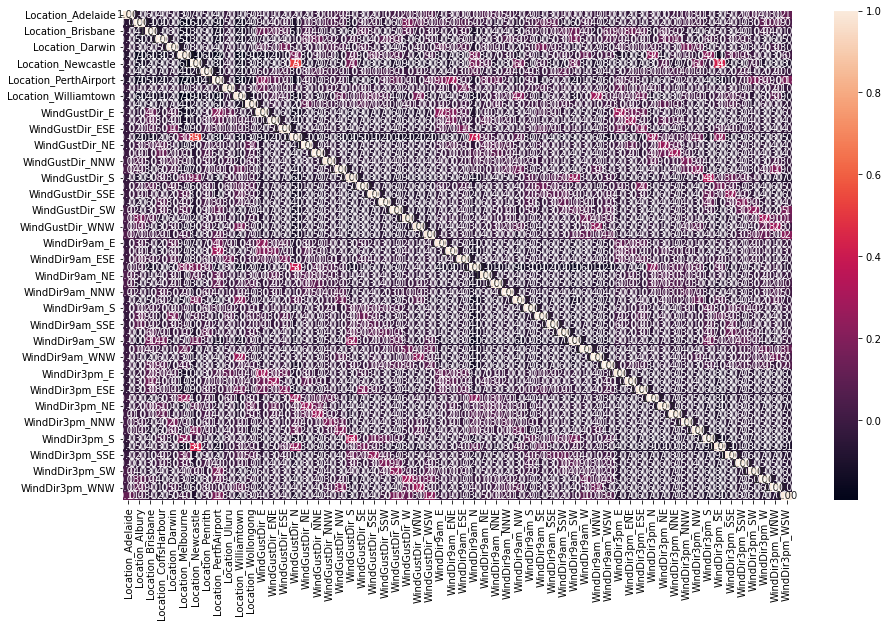

In [366]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df[ohe_cols].corr(),annot=True, fmt=".2f")

In [367]:
df.corr()[df.corr()<1].min().sort_values()

Cloud3pm            -0.589387
Sunshine            -0.589387
Cloud9am            -0.579209
Humidity3pm         -0.495140
Temp3pm             -0.490450
                       ...   
WindGustDir_ESE     -0.089413
WindDir9am_ESE      -0.083068
WindDir3pm_NNE      -0.080317
Location_Adelaide   -0.077171
WindGustDir_NNW     -0.075183
Length: 80, dtype: float64

In [368]:
df.corr()[df.corr()<1].max().sort_values()

WindDir9am_NNW    0.074981
WindDir9am_S      0.082829
WindDir9am_WSW    0.096153
WindDir9am_SSE    0.103668
WindDir9am_NE     0.104996
                    ...   
MinTemp           0.887993
Pressure9am       0.961214
Pressure3pm       0.961214
Temp3pm           0.974484
MaxTemp           0.974484
Length: 80, dtype: float64

In [369]:
#dropping columns which are highly correlated
df.drop(columns=['Temp3pm'],inplace=True)
df.drop(columns=['Pressure9am'],inplace=True)

In [370]:
df.corr()[df.corr()<1].max().sort_values()

WindDir9am_NNW          0.074981
WindDir9am_S            0.082829
WindDir9am_WSW          0.096153
WindDir9am_SSE          0.103668
WindDir9am_NE           0.104996
                          ...   
year                    0.672091
Location_Williamtown    0.672091
MaxTemp                 0.864744
Temp9am                 0.887993
MinTemp                 0.887993
Length: 78, dtype: float64

In [371]:
# Drop columns for which we have already made dummy columns
df.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm'],inplace=True)

In [372]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'RainToday', 'RainTomorrow', 'RainfallTomorrow', 'year', 'month',
       'Location_Adelaide', 'Location_Albury', 'Location_Brisbane',
       'Location_CoffsHarbour', 'Location_Darwin', 'Location_Melbourne',
       'Location_Newcastle', 'Location_Penrith', 'Location_PerthAirport',
       'Location_Uluru', 'Location_Williamtown', 'Location_Wollongong',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9a

### Model Building (Target variable- RainTomorrow)

In [373]:
# Create X with all independent variable
X=df.drop(columns=['RainTomorrow', 'RainfallTomorrow'])
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,9.5,19.3,0.0,5.0,9.5,28.0,0.0,13.0,91.0,51.0,...,0,0,1,0,0,0,0,0,0,0
1,9.8,17.0,0.0,5.0,9.5,26.0,4.0,13.0,67.0,53.0,...,0,0,0,0,1,0,0,0,0,0
2,6.7,14.5,0.0,5.0,9.5,24.0,7.0,9.0,72.0,52.0,...,0,0,0,0,0,0,0,0,0,0
3,5.7,19.0,0.0,4.4,9.5,33.0,17.0,17.0,48.0,41.0,...,0,0,0,0,0,0,0,0,0,0
4,9.7,17.2,0.0,2.0,9.5,30.0,13.0,7.0,54.0,53.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,9.0,17.0,0.6,5.0,9.5,72.0,26.0,44.0,52.0,73.0,...,0,0,1,0,0,0,0,0,0,0
8065,9.0,17.0,0.6,5.0,9.5,72.0,26.0,44.0,52.0,73.0,...,0,0,1,0,0,0,0,0,0,0
8066,8.8,15.6,1.2,3.4,5.5,33.0,19.0,7.0,57.0,56.0,...,0,0,0,0,0,0,0,0,0,0
8067,8.8,15.6,1.2,3.4,5.5,33.0,19.0,7.0,57.0,56.0,...,0,0,0,0,0,0,0,0,0,0


#### Feature scaling of numerical columns

In [374]:
ss=StandardScaler()

In [375]:
X[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm','Cloud9am','Cloud3pm','Temp9am']]=ss.fit_transform(X[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm','Cloud9am','Cloud3pm','Temp9am']])
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,-0.674169,-0.746258,-0.267460,-0.021167,0.457790,-0.851711,-1.354450,-0.556631,1.381218,-0.011491,...,0,0,1,0,0,0,0,0,0,0
1,-0.618721,-1.122998,-0.267460,-0.021167,0.457790,-0.996807,-0.959913,-0.556631,-0.044307,0.097335,...,0,0,0,0,1,0,0,0,0,0
2,-1.191687,-1.532498,-0.267460,-0.021167,0.457790,-1.141903,-0.664011,-0.968228,0.252678,0.042922,...,0,0,0,0,0,0,0,0,0,0
3,-1.376515,-0.795398,-0.267460,-0.173189,0.457790,-0.488972,0.322330,-0.145033,-1.172847,-0.555623,...,0,0,0,0,0,0,0,0,0,0
4,-0.637203,-1.090238,-0.267460,-0.781279,0.457790,-0.706616,-0.072206,-1.174027,-0.816466,0.097335,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,-0.766583,-1.122998,-0.210267,-0.021167,0.457790,2.340394,1.210037,2.633249,-0.935259,1.185599,...,0,0,1,0,0,0,0,0,0,0
8065,-0.766583,-1.122998,-0.210267,-0.021167,0.457790,2.340394,1.210037,2.633249,-0.935259,1.185599,...,0,0,1,0,0,0,0,0,0,0
8066,-0.803549,-1.352318,-0.153073,-0.426560,-0.842401,-0.488972,0.519598,-1.174027,-0.638275,0.260575,...,0,0,0,0,0,0,0,0,0,0
8067,-0.803549,-1.352318,-0.153073,-0.426560,-0.842401,-0.488972,0.519598,-1.174027,-0.638275,0.260575,...,0,0,0,0,0,0,0,0,0,0


In [376]:
# Create y with only target variable
y=df['RainTomorrow']
y

0        No
1        No
2        No
3        No
4        No
       ... 
8064    Yes
8065    Yes
8066     No
8067     No
8068     No
Name: RainTomorrow, Length: 8069, dtype: object

In [377]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
38,inf,WindGustDir_SE
49,inf,WindDir9am_NE
56,inf,WindDir9am_SSW
55,inf,WindDir9am_SSE
54,inf,WindDir9am_SE
...,...,...
14,1.900285,RainToday
10,1.695164,Pressure3pm
16,1.441476,month
2,1.331094,Rainfall


There are lots of columns with inf VIF value. Rather than removing one by one we'll first do recursive feature elemination.

#### RFE - Logistic Regression

In [378]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [379]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6051, 77)
(2018, 77)
(6051,)
(2018,)


In [380]:
lr=LogisticRegression()
rfe = RFE(lr, n_features_to_select=20)
rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False])

In [381]:
X_train_rfe=X_train[X_train.columns[rfe.support_].tolist()]
X_test_rfe=X_test[X_train.columns[rfe.support_].tolist()]

In [382]:
#check VIF 
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif['feature']=X_train_rfe.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,1.621803,Humidity3pm
3,1.437813,RainToday
2,1.405989,Cloud3pm
11,1.344164,WindGustDir_E
8,1.296171,Location_PerthAirport
0,1.272996,WindGustSpeed
6,1.229392,Location_Brisbane
5,1.204567,Location_Albury
16,1.167350,WindDir3pm_E
14,1.149628,WindDir9am_E


In [383]:
# Keep only relevant coluns which we got after RFE and dropping after checking VIF
X_train=X_train[X_train_rfe.columns]
X_test=X_test[X_train_rfe.columns]
print(X_train.shape)
print(X_test.shape)

(6051, 20)
(2018, 20)


In [384]:
y_train.value_counts()

No     4603
Yes    1448
Name: RainTomorrow, dtype: int64

In [385]:
# Check for class imbalance and handle
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [386]:
y_train.value_counts()

No     4603
Yes    4603
Name: RainTomorrow, dtype: int64

#### Logistic Regression

In [387]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [388]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [389]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.7841625027156203

In [390]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [391]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[1237,  307],
       [ 119,  355]], dtype=int64)

In [392]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7888999008919723

#### RFE - RandomForest

In [393]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [394]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6051, 77)
(2018, 77)
(6051,)
(2018,)


In [395]:
rf=RandomForestClassifier()
rfe = RFE(rf, n_features_to_select=20)
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False])

In [396]:
X_train_rfe=X_train[X_train.columns[rfe.support_].tolist()]
X_test_rfe=X_test[X_train.columns[rfe.support_].tolist()]

In [397]:
#check VIF 
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif['feature']=X_train_rfe.columns
vif.sort_values(by='value',ascending=False)

,value,feature
13,16.240759,Temp9am
1,9.433210,MaxTemp
0,8.273103,MinTemp
15,5.892437,year
16,5.165835,month
9,3.786051,Humidity3pm
8,3.490000,Humidity9am
5,2.372439,WindGustSpeed
14,2.352356,RainToday
4,2.162543,Sunshine


In [398]:
X_train_rfe.drop(columns=['Temp9am'],inplace=True)
#check VIF 
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif['feature']=X_train_rfe.columns
vif.sort_values(by='value',ascending=False)

,value,feature
14,5.879942,year
1,5.304690,MaxTemp
15,5.129933,month
0,4.571307,MinTemp
9,2.953366,Humidity3pm
8,2.502007,Humidity9am
13,2.346917,RainToday
5,2.337067,WindGustSpeed
4,2.160871,Sunshine
6,2.032548,WindSpeed9am


In [399]:
# Keep only relevant coluns which we got after RFE and dropping after checking VIF
X_train=X_train[X_train_rfe.columns]
X_test=X_test[X_train_rfe.columns]
print(X_train.shape)
print(X_test.shape)

(6051, 19)
(2018, 19)


In [400]:
y_train.value_counts()

No     4603
Yes    1448
Name: RainTomorrow, dtype: int64

In [401]:
# Check for class imbalance and handle
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [402]:
y_train.value_counts()

No     4603
Yes    4603
Name: RainTomorrow, dtype: int64

#### Random Forest

In [403]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [404]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [405]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [406]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [407]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[1434,  110],
       [ 126,  348]], dtype=int64)

In [410]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8830525272547076

The Random forest classifier has better accuracy score in test data than Logistic regression.
But in Random forest model as we can see the train accuracy score is 100% but the test accuracy score is significantly lower, this means model is overfitting.

Let's do hyperparameter tuning to handle overfitting

#### Hyperparameter tuning

In [411]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [421]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 35, 40],
    #'max_depth': [30],
    #'min_samples_split': [3, 4, 5],
    #'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    'max_features': ["auto", "sqrt", "log2"],
    #'max_features': ["sqrt"],
    'n_estimators': [100, 150, 200]
    #'n_estimators': [150]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [422]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START bootstrap=True, max_depth=30, max_features=auto, n_estimators=100
[CV 1/5; 1/27] END bootstrap=True, max_depth=30, max_features=auto, n_estimators=100;, score=0.876 total time=   0.8s
[CV 2/5; 1/27] START bootstrap=True, max_depth=30, max_features=auto, n_estimators=100
[CV 2/5; 1/27] END bootstrap=True, max_depth=30, max_features=auto, n_estimators=100;, score=0.892 total time=   0.8s
[CV 3/5; 1/27] START bootstrap=True, max_depth=30, max_features=auto, n_estimators=100
[CV 3/5; 1/27] END bootstrap=True, max_depth=30, max_features=auto, n_estimators=100;, score=0.941 total time=   0.8s
[CV 4/5; 1/27] START bootstrap=True, max_depth=30, max_features=auto, n_estimators=100
[CV 4/5; 1/27] END bootstrap=True, max_depth=30, max_features=auto, n_estimators=100;, score=0.934 total time=   0.8s
[CV 5/5; 1/27] START bootstrap=True, max_depth=30, max_features=auto, n_estimators=100
[CV 5/5; 1/27] END bootstrap=Tr

[CV 1/5; 9/27] END bootstrap=True, max_depth=30, max_features=log2, n_estimators=200;, score=0.871 total time=   1.7s
[CV 2/5; 9/27] START bootstrap=True, max_depth=30, max_features=log2, n_estimators=200
[CV 2/5; 9/27] END bootstrap=True, max_depth=30, max_features=log2, n_estimators=200;, score=0.897 total time=   1.6s
[CV 3/5; 9/27] START bootstrap=True, max_depth=30, max_features=log2, n_estimators=200
[CV 3/5; 9/27] END bootstrap=True, max_depth=30, max_features=log2, n_estimators=200;, score=0.944 total time=   1.6s
[CV 4/5; 9/27] START bootstrap=True, max_depth=30, max_features=log2, n_estimators=200
[CV 4/5; 9/27] END bootstrap=True, max_depth=30, max_features=log2, n_estimators=200;, score=0.937 total time=   1.6s
[CV 5/5; 9/27] START bootstrap=True, max_depth=30, max_features=log2, n_estimators=200
[CV 5/5; 9/27] END bootstrap=True, max_depth=30, max_features=log2, n_estimators=200;, score=0.942 total time=   1.6s
[CV 1/5; 10/27] START bootstrap=True, max_depth=35, max_featur

[CV 1/5; 17/27] END bootstrap=True, max_depth=35, max_features=log2, n_estimators=150;, score=0.876 total time=   1.2s
[CV 2/5; 17/27] START bootstrap=True, max_depth=35, max_features=log2, n_estimators=150
[CV 2/5; 17/27] END bootstrap=True, max_depth=35, max_features=log2, n_estimators=150;, score=0.895 total time=   1.2s
[CV 3/5; 17/27] START bootstrap=True, max_depth=35, max_features=log2, n_estimators=150
[CV 3/5; 17/27] END bootstrap=True, max_depth=35, max_features=log2, n_estimators=150;, score=0.944 total time=   1.2s
[CV 4/5; 17/27] START bootstrap=True, max_depth=35, max_features=log2, n_estimators=150
[CV 4/5; 17/27] END bootstrap=True, max_depth=35, max_features=log2, n_estimators=150;, score=0.936 total time=   1.3s
[CV 5/5; 17/27] START bootstrap=True, max_depth=35, max_features=log2, n_estimators=150
[CV 5/5; 17/27] END bootstrap=True, max_depth=35, max_features=log2, n_estimators=150;, score=0.937 total time=   1.2s
[CV 1/5; 18/27] START bootstrap=True, max_depth=35, m

[CV 1/5; 25/27] END bootstrap=True, max_depth=40, max_features=log2, n_estimators=100;, score=0.871 total time=   0.8s
[CV 2/5; 25/27] START bootstrap=True, max_depth=40, max_features=log2, n_estimators=100
[CV 2/5; 25/27] END bootstrap=True, max_depth=40, max_features=log2, n_estimators=100;, score=0.893 total time=   0.8s
[CV 3/5; 25/27] START bootstrap=True, max_depth=40, max_features=log2, n_estimators=100
[CV 3/5; 25/27] END bootstrap=True, max_depth=40, max_features=log2, n_estimators=100;, score=0.940 total time=   0.8s
[CV 4/5; 25/27] START bootstrap=True, max_depth=40, max_features=log2, n_estimators=100
[CV 4/5; 25/27] END bootstrap=True, max_depth=40, max_features=log2, n_estimators=100;, score=0.934 total time=   0.8s
[CV 5/5; 25/27] START bootstrap=True, max_depth=40, max_features=log2, n_estimators=100
[CV 5/5; 25/27] END bootstrap=True, max_depth=40, max_features=log2, n_estimators=100;, score=0.936 total time=   0.8s
[CV 1/5; 26/27] START bootstrap=True, max_depth=40, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 35, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [423]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 150}


In [424]:
#Fit the random forest classifier model
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=150)

In [425]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [426]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [427]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [428]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[1442,  102],
       [ 122,  352]], dtype=int64)

In [429]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8889990089197225

After hyperparameter tuning there isn't much change in the train and test accuracy. As random forest gives better results, we'll go ahead with that.

In [430]:
# Saving the best model
pickle.dump(lr, open('model_rainfall_classification.pkl', 'wb'))

### Model Building (Target variable- RainFallTomorrow)

In [431]:
# Create X with all independent variable
#X=df.drop(columns=['RainTomorrow', 'RainfallTomorrow'])
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,-0.674169,-0.746258,-0.267460,-0.021167,0.457790,-0.851711,-1.354450,-0.556631,1.381218,-0.011491,...,0,0,1,0,0,0,0,0,0,0
1,-0.618721,-1.122998,-0.267460,-0.021167,0.457790,-0.996807,-0.959913,-0.556631,-0.044307,0.097335,...,0,0,0,0,1,0,0,0,0,0
2,-1.191687,-1.532498,-0.267460,-0.021167,0.457790,-1.141903,-0.664011,-0.968228,0.252678,0.042922,...,0,0,0,0,0,0,0,0,0,0
3,-1.376515,-0.795398,-0.267460,-0.173189,0.457790,-0.488972,0.322330,-0.145033,-1.172847,-0.555623,...,0,0,0,0,0,0,0,0,0,0
4,-0.637203,-1.090238,-0.267460,-0.781279,0.457790,-0.706616,-0.072206,-1.174027,-0.816466,0.097335,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,-0.766583,-1.122998,-0.210267,-0.021167,0.457790,2.340394,1.210037,2.633249,-0.935259,1.185599,...,0,0,1,0,0,0,0,0,0,0
8065,-0.766583,-1.122998,-0.210267,-0.021167,0.457790,2.340394,1.210037,2.633249,-0.935259,1.185599,...,0,0,1,0,0,0,0,0,0,0
8066,-0.803549,-1.352318,-0.153073,-0.426560,-0.842401,-0.488972,0.519598,-1.174027,-0.638275,0.260575,...,0,0,0,0,0,0,0,0,0,0
8067,-0.803549,-1.352318,-0.153073,-0.426560,-0.842401,-0.488972,0.519598,-1.174027,-0.638275,0.260575,...,0,0,0,0,0,0,0,0,0,0


In [432]:
# Create y with only target variable
y=df['RainfallTomorrow']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8064    0.6
8065    1.2
8066    1.2
8067    0.0
8068    0.0
Name: RainfallTomorrow, Length: 8069, dtype: float64

#### RFE - Linear Regression

In [433]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [434]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6051, 77)
(2018, 77)
(6051,)
(2018,)


In [435]:
lr=LinearRegression()
rfe = RFE(lr, n_features_to_select=20)
rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True,  True, False])

In [436]:
X_train_rfe=X_train[X_train.columns[rfe.support_].tolist()]
X_test_rfe=X_test[X_train.columns[rfe.support_].tolist()]

In [437]:
#check VIF 
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif['feature']=X_train_rfe.columns
vif.sort_values(by='value',ascending=False)

,value,feature
16,1.345500,WindDir3pm_SE
14,1.145970,WindDir3pm_NE
13,1.120615,WindDir3pm_N
17,1.106991,WindDir3pm_SSE
12,1.100262,WindDir3pm_E
19,1.083164,WindDir3pm_WNW
18,1.079704,WindDir3pm_W
15,1.075427,WindDir3pm_NNE
4,1.034137,Location_Darwin
9,1.024679,Location_Uluru


In [438]:
# Keep only relevant coluns which we got after RFE and dropping after checking VIF
X_train=X_train[X_train_rfe.columns]
X_test=X_test[X_train_rfe.columns]
print(X_train.shape)
print(X_test.shape)

(6051, 20)
(2018, 20)


In [439]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [440]:
# Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([2.30078125, 3.08789062, 1.171875  , ..., 1.80273438, 2.3984375 ,
       4.26367188])

In [441]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

112.48776738920954

In [442]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.015611271037917929

In [443]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([2.82617188, 0.109375  , 4.27929688, ..., 2.30078125, 2.3984375 ,
       1.609375  ])

In [444]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

59.893654504025534

In [445]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

-0.01310358750201579

#### Do PCA on all the columns and check if the results are improved.

In [446]:
#As there are lots of columns we'll handle multicolliniarity by using PCA
pca = PCA()
#plot the graph to find the principal components
X_pca = pca.fit_transform(X)
X_pca

array([[ 5.57378820e-01,  1.95748293e+00, -2.22914708e+00, ...,
         2.05926641e-16, -2.89900614e-15,  1.19293416e-15],
       [ 5.09207699e-01,  1.90046239e+00, -1.71543908e+00, ...,
        -2.12117668e-16, -3.96944340e-15,  5.60040723e-16],
       [ 3.79141713e-01,  1.87306519e+00, -2.33044387e+00, ...,
         3.69366506e-16,  3.83378233e-17,  8.25312975e-16],
       ...,
       [-1.38645760e+00, -3.07239527e+00, -2.17522110e+00, ...,
         3.21438378e-17, -6.43532493e-17, -2.65513515e-17],
       [-1.38645760e+00, -3.07239527e+00, -2.17522110e+00, ...,
         3.21438378e-17, -6.43532493e-17, -2.65513515e-17],
       [-1.38379977e+00, -2.87240902e+00, -9.30106509e-01, ...,
         7.46649175e-17,  7.55529933e-17, -6.54663066e-17]])

In [447]:
# Check the cumulative sum of variance ratio to decide on the acceptable loss in variance.
np.cumsum(pca.explained_variance_ratio_)

array([0.33620125, 0.50971668, 0.62482141, 0.70386034, 0.75645404,
       0.78226073, 0.80530916, 0.82620846, 0.8461513 , 0.85979457,
       0.87117264, 0.88196563, 0.89211256, 0.90058227, 0.90761836,
       0.91267279, 0.91672962, 0.92064339, 0.92387485, 0.92680503,
       0.92959718, 0.93226545, 0.9347781 , 0.93717832, 0.93951048,
       0.94172634, 0.94384566, 0.94589838, 0.94785921, 0.94976084,
       0.95165205, 0.95351096, 0.95534231, 0.95711938, 0.95881406,
       0.96048885, 0.96210995, 0.9637017 , 0.96524458, 0.96676023,
       0.96825102, 0.96971917, 0.97117756, 0.97258999, 0.97398394,
       0.97536303, 0.97672646, 0.97807563, 0.97941537, 0.98074226,
       0.98201428, 0.98324474, 0.98444943, 0.98562543, 0.98677107,
       0.98790757, 0.9889905 , 0.98999749, 0.99094939, 0.99187696,
       0.99277853, 0.99364196, 0.99448164, 0.99528868, 0.99603814,
       0.99676376, 0.9974499 , 0.9980634 , 0.99866125, 0.99919338,
       0.99967335, 0.99991393, 1.        , 1.        , 1.     

In [448]:
# As we can see using 5 components the loss in variance is less than 10% so we'll use only 7 components.
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X)
X_pca

array([[ 5.57378820e-01,  1.95748293e+00, -2.22914708e+00, ...,
         2.76319177e-03,  2.54669877e-01,  1.01369042e-02],
       [ 5.09207699e-01,  1.90046239e+00, -1.71543908e+00, ...,
         1.56472271e-01,  1.44536431e-01,  5.02205625e-01],
       [ 3.79141713e-01,  1.87306519e+00, -2.33044387e+00, ...,
        -2.42041742e-01,  7.96643575e-02, -2.16954928e-01],
       ...,
       [-1.38645760e+00, -3.07239527e+00, -2.17522110e+00, ...,
        -1.62320571e-01, -2.47217435e-01, -3.10333672e-01],
       [-1.38645760e+00, -3.07239527e+00, -2.17522110e+00, ...,
        -1.62320571e-01, -2.47217435e-01, -3.10333672e-01],
       [-1.38379977e+00, -2.87240902e+00, -9.30106512e-01, ...,
         4.28967931e-02, -1.28821239e-01, -5.60081732e-01]])

In [449]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=80)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6051, 40)
(2018, 40)
(6051,)
(2018,)


In [450]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [451]:
# Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([ 7.86499856,  4.51978712, -1.91065586, ...,  4.653571  ,
       -0.12316624, -0.60806962])

In [452]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

89.50714813224387

In [453]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.2167163610060916

In [454]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([-0.03499695, -1.28392021,  2.53509766, ..., -3.12582439,
        0.04721467,  0.01170117])

In [455]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

40.102437743280454

In [456]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.32166564418668064

#### RFE - RandomForest

In [457]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [458]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6051, 77)
(2018, 77)
(6051,)
(2018,)


In [459]:
rf=RandomForestRegressor()
rfe = RFE(rf, n_features_to_select=20)
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [460]:
X_train_rfe=X_train[X_train.columns[rfe.support_].tolist()]
X_test_rfe=X_test[X_train.columns[rfe.support_].tolist()]

In [461]:
#check VIF 
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif['feature']=X_train_rfe.columns
vif.sort_values(by='value',ascending=False)

,value,feature
11,16.523048,Temp9am
1,9.162772,MaxTemp
0,8.007709,MinTemp
12,5.374193,year
13,5.114731,month
9,3.683108,Humidity3pm
8,3.294751,Humidity9am
5,2.305191,WindGustSpeed
6,2.071731,WindSpeed9am
7,1.972643,WindSpeed3pm


In [462]:
X_train_rfe.drop(columns=['Temp9am'],inplace=True)
#check VIF 
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif['feature']=X_train_rfe.columns
vif.sort_values(by='value',ascending=False)

,value,feature
11,5.314375,year
1,5.086120,MaxTemp
12,5.082783,month
0,4.230725,MinTemp
9,3.004675,Humidity3pm
8,2.328822,Humidity9am
5,2.272836,WindGustSpeed
6,2.052034,WindSpeed9am
7,1.928292,WindSpeed3pm
4,1.628242,Sunshine


In [463]:
# Keep only relevant coluns which we got after RFE and dropping after checking VIF
X_train=X_train[X_train_rfe.columns]
X_test=X_test[X_train_rfe.columns]
print(X_train.shape)
print(X_test.shape)

(6051, 19)
(2018, 19)


#### Random Forest

In [464]:
# Fit the Random Forest Classifier model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [465]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([0.822     , 0.576     , 0.15013333, ..., 4.533     , 0.042     ,
       0.03666667])

In [466]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

18.888089335059895

In [467]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.8347089404954673

In [468]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([0.142     , 0.001     , 0.057     , ..., 0.126     , 0.07733333,
       0.088     ])

In [469]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

73.63004005374303

In [470]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

-0.2454551044526856

The R2 is very low on test data.

#### Do PCA on all the columns and check if the results are improved.

In [471]:
#As there are lots of columns we'll handle multicolliniarity by using PCA
pca = PCA()
#plot the graph to find the principal components
X_pca = pca.fit_transform(X)
X_pca

array([[ 5.57378820e-01,  1.95748293e+00, -2.22914708e+00, ...,
         2.05926641e-16, -2.89900614e-15,  1.19293416e-15],
       [ 5.09207699e-01,  1.90046239e+00, -1.71543908e+00, ...,
        -2.12117668e-16, -3.96944340e-15,  5.60040723e-16],
       [ 3.79141713e-01,  1.87306519e+00, -2.33044387e+00, ...,
         3.69366506e-16,  3.83378233e-17,  8.25312975e-16],
       ...,
       [-1.38645760e+00, -3.07239527e+00, -2.17522110e+00, ...,
         3.21438378e-17, -6.43532493e-17, -2.65513515e-17],
       [-1.38645760e+00, -3.07239527e+00, -2.17522110e+00, ...,
         3.21438378e-17, -6.43532493e-17, -2.65513515e-17],
       [-1.38379977e+00, -2.87240902e+00, -9.30106509e-01, ...,
         7.46649175e-17,  7.55529933e-17, -6.54663066e-17]])

In [472]:
# Check the cumulative sum of variance ratio to decide on the acceptable loss in variance.
np.cumsum(pca.explained_variance_ratio_)

array([0.33620125, 0.50971668, 0.62482141, 0.70386034, 0.75645404,
       0.78226073, 0.80530916, 0.82620846, 0.8461513 , 0.85979457,
       0.87117264, 0.88196563, 0.89211256, 0.90058227, 0.90761836,
       0.91267279, 0.91672962, 0.92064339, 0.92387485, 0.92680503,
       0.92959718, 0.93226545, 0.9347781 , 0.93717832, 0.93951048,
       0.94172634, 0.94384566, 0.94589838, 0.94785921, 0.94976084,
       0.95165205, 0.95351096, 0.95534231, 0.95711938, 0.95881406,
       0.96048885, 0.96210995, 0.9637017 , 0.96524458, 0.96676023,
       0.96825102, 0.96971917, 0.97117756, 0.97258999, 0.97398394,
       0.97536303, 0.97672646, 0.97807563, 0.97941537, 0.98074226,
       0.98201428, 0.98324474, 0.98444943, 0.98562543, 0.98677107,
       0.98790757, 0.9889905 , 0.98999749, 0.99094939, 0.99187696,
       0.99277853, 0.99364196, 0.99448164, 0.99528868, 0.99603814,
       0.99676376, 0.9974499 , 0.9980634 , 0.99866125, 0.99919338,
       0.99967335, 0.99991393, 1.        , 1.        , 1.     

In [473]:
# As we can see using 5 components the loss in variance is less than 10% so we'll use only 7 components.
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X)
X_pca

array([[ 0.55737882,  1.95748293, -2.22914708, ..., -0.25918919,
        -0.16446397, -0.07919086],
       [ 0.5092077 ,  1.90046239, -1.71543908, ..., -0.22945958,
         0.2339262 ,  0.26119425],
       [ 0.37914171,  1.87306519, -2.33044387, ..., -0.29942034,
        -0.05526037, -0.14725158],
       ...,
       [-1.3864576 , -3.07239527, -2.17522111, ...,  0.12120238,
        -0.02145667,  0.06469419],
       [-1.3864576 , -3.07239527, -2.17522111, ...,  0.12120238,
        -0.02145667,  0.06469419],
       [-1.38379977, -2.87240902, -0.93010651, ...,  0.2096867 ,
        -0.23810346,  0.28703821]])

In [474]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=80)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6051, 40)
(2018, 40)
(6051,)
(2018,)


In [475]:
# Fit the Random Forest Classifier model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [476]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([3.051     , 1.149     , 0.526     , ..., 2.12203333, 0.012     ,
       0.116     ])

In [477]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

19.830400324525108

In [478]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.8264627076940183

In [479]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([1.49916667, 0.373     , 1.50386667, ..., 0.22      , 0.014     ,
       0.05533333])

In [480]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

56.62094423906135

In [481]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.042254438949134165

For predicting the RainfallTomorrow, Linear Regression model after applying PCA gives better result among the rest.

In [482]:
# Saving the best model
pickle.dump(lr, open('model_rainfall_regression.pkl', 'wb'))